In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sheryanalysis as sh
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('insurance.csv')

In [50]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Now analyzing the data


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [52]:
df.shape

(1338, 7)

In [53]:
df.isnull().sum()
# No null values found in the data set

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [54]:
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (1338, 7)
🧱 Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

✅ No null values found

🔠 Categorical Columns: ['age', 'sex', 'children', 'smoker', 'region']

🔢 Numerical Columns: ['bmi', 'charges']


{'shape': (1338, 7),
 'columns': ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
 'dtypes': {'age': dtype('int64'),
  'sex': dtype('O'),
  'bmi': dtype('float64'),
  'children': dtype('int64'),
  'smoker': dtype('O'),
  'region': dtype('O'),
  'charges': dtype('float64')},
 'null_counts': {'age': 0,
  'sex': 0,
  'bmi': 0,
  'children': 0,
  'smoker': 0,
  'region': 0,
  'charges': 0},
 'total_rows': 1338,
 'column_types': {'categorical': ['age',
   'sex',
   'children',
   'smoker',
   'region'],
  'numerical': ['bmi', 'charges'],
  'datetime': [],
  'text': []}}

# Visualizing the data

In [55]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='bmi', ylabel='charges'>

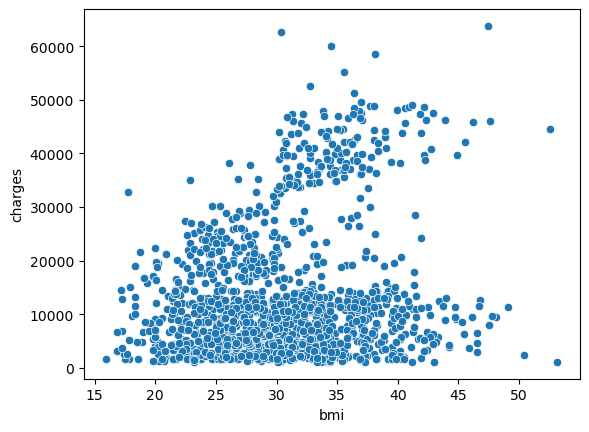

In [56]:
sns.scatterplot(data=df, x='bmi', y= 'charges')
# we can see that it is almost the linear function also giving the glimpse of the polynomial

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  

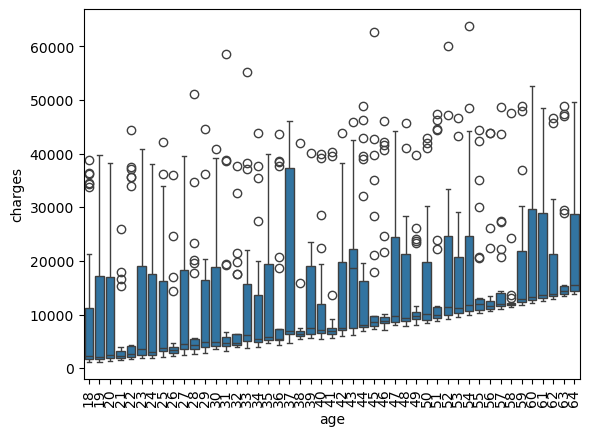

In [57]:
sns.boxplot(x = 'age', y = 'charges', data = df)
plt.xticks(rotation = 90)
# As the age of the person increases the charges also increases and so we can use this feature

<Axes: xlabel='sex', ylabel='charges'>

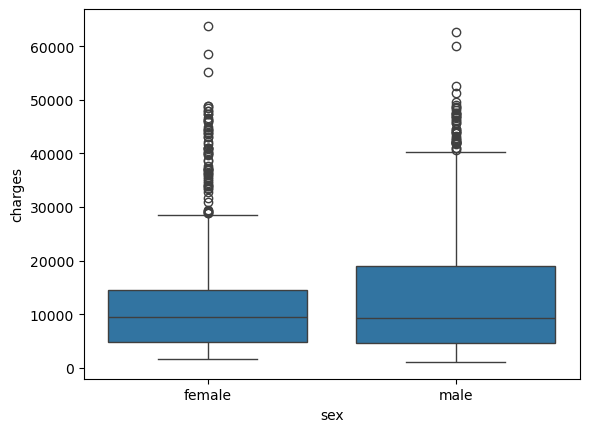

In [58]:
sns.boxplot(x = 'sex', y = 'charges', data = df)
# we can clearly see that the male has the slightly high charges as compare ot the women even in the outliers

<Axes: xlabel='children', ylabel='charges'>

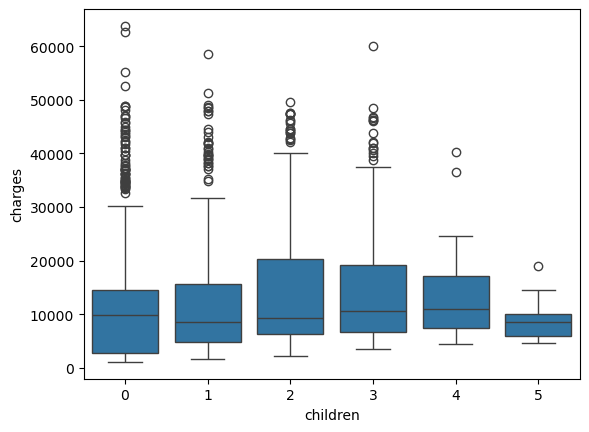

In [59]:
sns.boxplot(x = 'children', y = 'charges', data = df)
# so the children trnd is almost same except the few anomilities

<Axes: xlabel='region', ylabel='charges'>

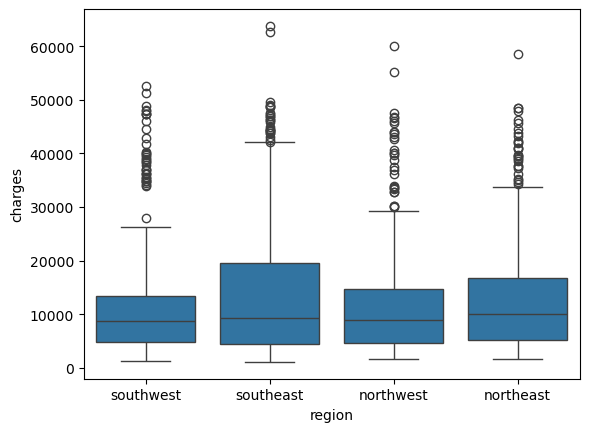

In [60]:
sns.boxplot(x = 'region', y = 'charges', data = df)
# so the east regoin got more of it as compare to the west one

<Axes: xlabel='smoker', ylabel='charges'>

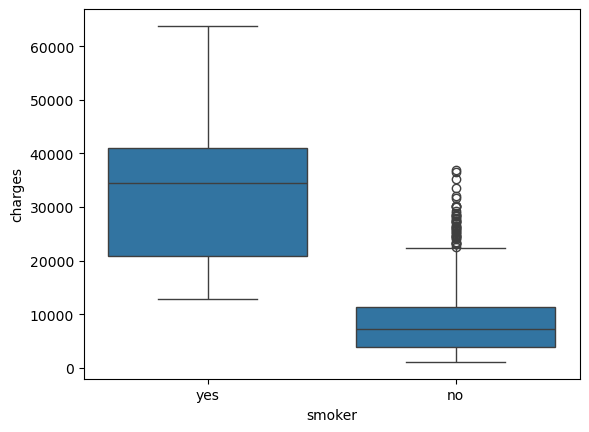

In [61]:
sns.boxplot(x = 'smoker', y = 'charges', data = df)
# so clearly the smoker has more chrges as compare to the rest of the others

<Axes: >

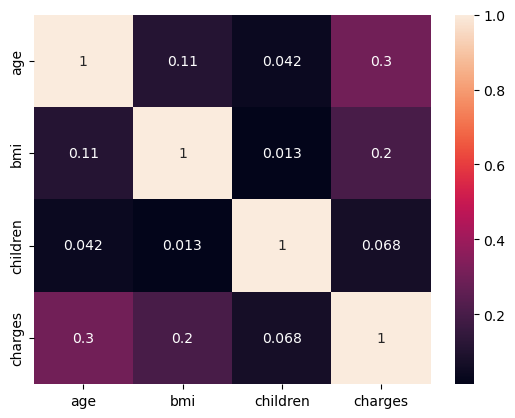

In [62]:
sns.heatmap(df.corr(numeric_only= True), annot = True)
# as predicted earlier children dont have a strong one but we got a good in the age and the bmi

<Axes: xlabel='children', ylabel='bmi'>

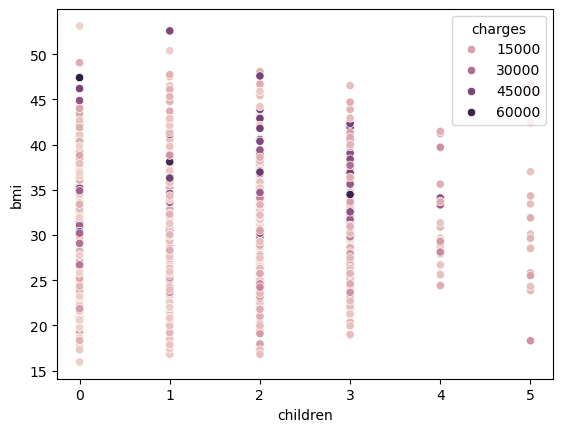

In [63]:
sns.scatterplot(x = 'children', y = 'bmi', hue = 'charges', data = df)

# Now creating the model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [66]:
df_encoded = pd.get_dummies(df, drop_first= True)

In [67]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [69]:
scaler = StandardScaler()
df_encoded[['age', 'bmi', 'children']] = scaler.fit_transform(df_encoded[['age', 'bmi', 'children']])

In [70]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,10600.54830,True,False,True,False,False
1334,-1.509965,0.206139,-0.908614,2205.98080,False,False,False,False,False
1335,-1.509965,1.014878,-0.908614,1629.83350,False,False,False,True,False
1336,-1.296362,-0.797813,-0.908614,2007.94500,False,False,False,False,True


In [71]:
df_encoded.astype(int)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1,0,0,16884,0,1,0,0,1
1,-1,0,0,1725,1,0,0,1,0
2,0,0,1,4449,1,0,0,1,0
3,0,-1,0,21984,1,0,1,0,0
4,0,0,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0,0,1,10600,1,0,1,0,0
1334,-1,0,0,2205,0,0,0,0,0
1335,-1,1,0,1629,0,0,0,1,0
1336,-1,0,0,2007,0,0,0,0,1


In [73]:
x = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state= 42)

In [75]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [76]:
y_pred = linear_model.predict(x_test)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 4181.19447375365
RMSE: 5796.2846592762735
R² Score: 0.7835929767120723


In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


rfc = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],          
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],            
    'max_features': ['auto', 'sqrt', 'log2']  
}


grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)


grid_search.fit(x_train, y_train)


print("Best Parameters:", grid_search.best_params_)

best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("R² Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

In [ ]:
import joblib
joblib.dump(best_rfc, 'model.pkl')  
joblib.dump(x.columns.tolist(), 'columns.pkl')


['columns.pkl']